<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Sukumarn_WSN_Pj%231_(11Mar2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [4]:
dataset["Class"].unique()

array([0, 1, 2, 3])

**Data Balancing**

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 15.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [9]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


**Data Preprocessing for Train and Testing**

In [11]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
y_test

array([0, 0, 0, ..., 0, 0, 2])

In [13]:
y_train

array([3, 2, 3, ..., 0, 2, 0])

In [14]:
X_train

array([[  2.        ,  76.04929558,  91.34967232, ...,   0.        ,
         18.        ,  14.        ],
       [  2.        ,  27.1369111 ,  83.7884711 , ...,   6.        ,
         66.        ,   4.        ],
       [  2.        ,  75.11756017,  17.        , ...,   0.        ,
         18.        ,  12.        ],
       ...,
       [  4.        , 341.7914501 , 114.        , ...,   0.        ,
        160.        , 144.        ],
       [  2.        , 276.00645098,  84.        , ...,   0.        ,
        160.        , 118.        ],
       [  2.        , 230.6194719 , 137.        , ...,   0.        ,
        160.        ,  96.        ]])

In [15]:
X_test

array([[  2.        , 175.6395855 , 133.        , ...,   0.        ,
        160.        ,  76.        ],
       [  2.        , 125.6150029 ,   2.        , ...,   0.        ,
        160.        ,  50.        ],
       [  2.        , 319.6261936 ,   4.        , ...,   0.        ,
        160.        , 136.        ],
       ...,
       [  2.        , 105.6394475 , 153.        , ...,   0.        ,
        160.        ,  40.        ],
       [  2.        ,  36.1139335 ,   5.        , ...,   0.        ,
        160.        ,   6.        ],
       [  1.        ,  93.01580727,  43.        , ...,   1.640072  ,
        160.        ,  32.6879424 ]])

**Multinomeal Naive Bayes**

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [17]:
len(y_test_prediction)

210281

In [18]:
len(y_test)

210281

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [20]:
# # Creating  a confusion matrix,which compares the y_test and y_pred
# cm = confusion_matrix(y_test, y_pred)
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['SETOSA','VERSICOLR','VIRGINICA'], 
#                      columns = ['SETOSA','VERSICOLR','VIRGINICA'])
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

Confusion Matrix of Multinomeal Naive Bayes


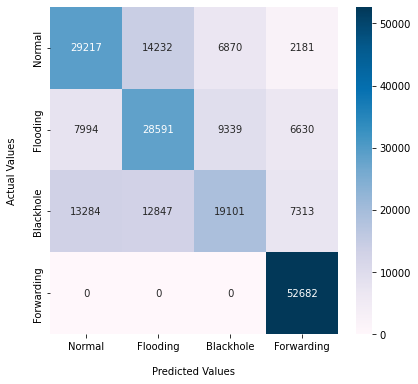

In [21]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [22]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 


In [23]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 61.62753648689135
Precision : 59.98097790432062
Recall : 61.62753648689135
F1-Score : 0.5996343703302702


**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix of Logistic Regression


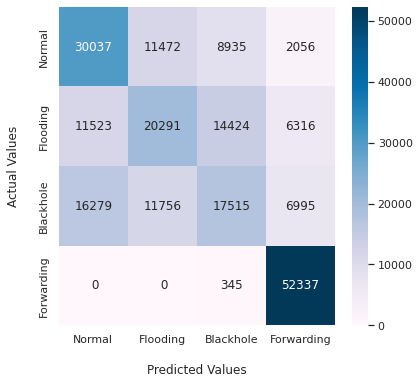

In [25]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [26]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 57.15209648042381
Precision : 54.60325364222876
Recall : 57.15209648042381
F1-Score : 0.5526880233608835


**KNN**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

Confusion Matrix of KNN


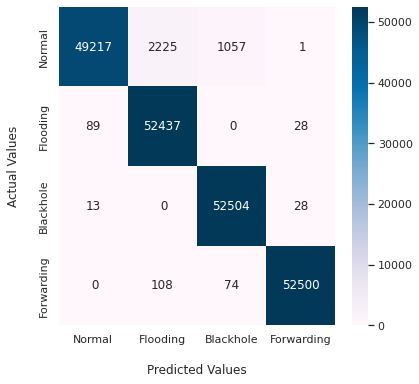

In [28]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [29]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 98.27706735273277
Precision : 98.32969399080525
Recall : 98.27706735273277
F1-Score : 0.9826674335728621


**SVM**

In [30]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix of SVM


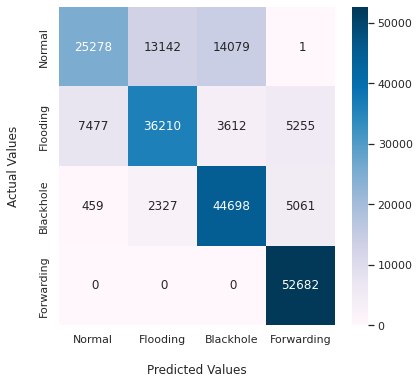

In [ ]:
print("Confusion Matrix of SVM") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("SVM",y_test, y_test_prediction)

Model Name is : SVM
Accuracy : 75.55033502789125
Precision : 75.36529630598787
Recall : 75.55033502789125
F1-Score : 0.7434472828741014


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

Confusion Matrix of Decision Tree


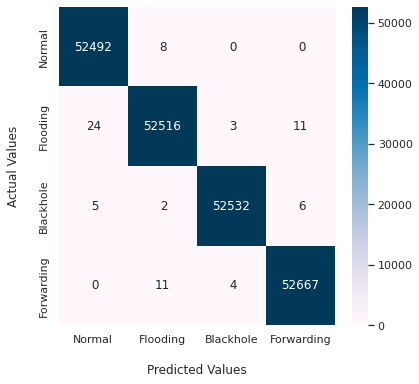

In [ ]:
print("Confusion Matrix of Decision Tree") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Decision Tree",y_test, y_test_prediction)

Model Name is : Decision Tree
Accuracy : 99.96480899367988
Precision : 99.9648112031529
Recall : 99.96480899367988
F1-Score : 0.9996480835640735


**K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
y_test_prediction=kmeans.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix of K-means


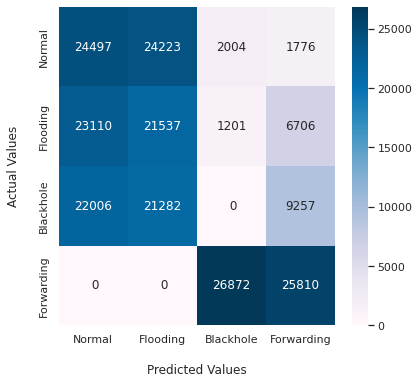

In [ ]:
print("Confusion Matrix of K-means") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("K-means",y_test, y_test_prediction)

Model Name is : K-means
Accuracy : 34.16571159543658
Precision : 31.66262681402855
Recall : 34.16571159543658
F1-Score : 0.32457286636865756


**Begging Method**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
y_test_prediction = bg.predict(X_test)

Confusion Matrix of Begging


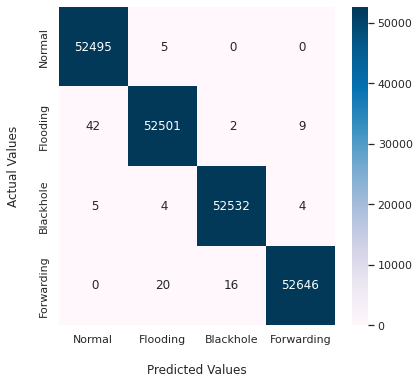

In [ ]:
print("Confusion Matrix of Begging") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Begging",y_test, y_test_prediction)

Model Name is : Begging
Accuracy : 99.94911570707768
Precision : 99.94912538697517
Recall : 99.94911570707768
F1-Score : 0.9994911400461196


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
y_test_prediction = adb.predict(X_test)

Confusion Matrix of Ada Boost


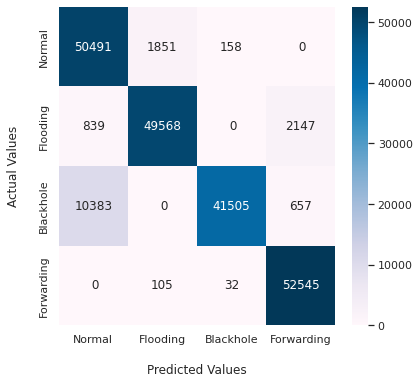

In [ ]:
print("Confusion Matrix of Ada Boost") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Ada Boost",y_test, y_test_prediction)

Model Name is : Ada Boost
Accuracy : 92.3093384566366
Precision : 93.12818327160065
Recall : 92.3093384566366
F1-Score : 0.9226131922174278


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

Confusion Matrix of Random Forest


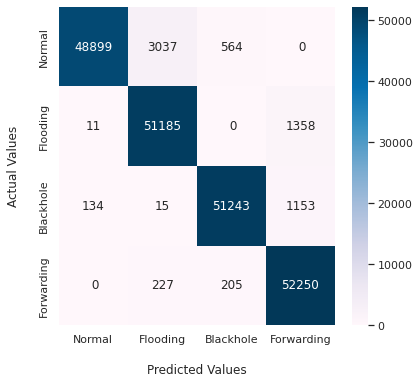

In [ ]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 96.81188504905342
Precision : 96.90329760072302
Recall : 96.81188504905342
F1-Score : 0.9681232514268232


**Multi Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
y_test_prediction = evc.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix of Voting


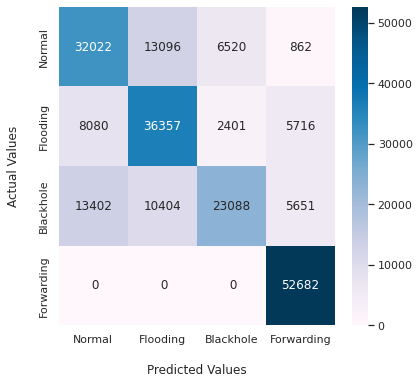

In [ ]:
print("Confusion Matrix of Voting") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Voting",y_test, y_test_prediction)

Model Name is : Voting
Accuracy : 68.5506536491647
Precision : 68.47967319327624
Recall : 68.5506536491647
F1-Score : 0.6734444002152306


## **Deep learning**

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# # load the data from the Excel file
# data = pd.read_excel('data.xlsx')

# # Pre-process the data 
# data_x = data.iloc[:, :-1].values
# data_y = data.iloc[:, -1].values

# # split the data into train and test sets 
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Build the deep learning model 
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/5
13143/13143 [==============================] - 27s 2ms/step - loss: 0.7939 - accuracy: 0.7549
Epoch 2/5
13143/13143 [==============================] - 28s 2ms/step - loss: 0.3822 - accuracy: 0.8480
Epoch 3/5
13143/13143 [==============================] - 31s 2ms/step - loss: 0.2528 - accuracy: 0.9007
Epoch 4/5
13143/13143 [==============================] - 28s 2ms/step - loss: 0.1949 - accuracy: 0.9262
Epoch 5/5
3286/3286 [==============================] - 6s 2ms/step - loss: 0.2381 - accuracy: 0.9168
Test Loss: 0.2381485253572464
Test Accuracy: 0.9168398380279541
6572/6572 [==============================] - 10s 1ms/step
Confusion Matrix:
[[42368  8762  1368     2]
 [  870 51624     3    57]
 [   40    14 52411    80]
 [    0  5184  1107 46391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.88     52500
           1       0.79      0.98      0.87     52554
           2       0.95      1.00      0.98     

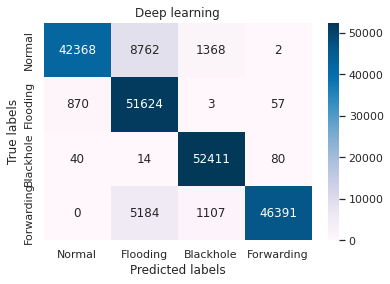

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
ax=sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

# set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Deep learning')
#plt.figure(figsize=(6,5.5))
  #ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  #sns.set(font_scale=1)
  #ax.set_xlabel('\nPredicted Values')
  #ax.set_ylabel('Actual Values\n');
ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])

# display the plot
plt.show()


**Multi-Layer Perceptron (MLP)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/5
26286/26286 [==============================] - 65s 2ms/step - loss: 0.6337 - accuracy: 0.8023 - val_loss: 0.2404 - val_accuracy: 0.9056
Epoch 2/5
26286/26286 [==============================] - 65s 2ms/step - loss: 0.2141 - accuracy: 0.9213 - val_loss: 0.2458 - val_accuracy: 0.9048
Epoch 3/5
26286/26286 [==============================] - 70s 3ms/step - loss: 0.1811 - accuracy: 0.9357 - val_loss: 0.1617 - val_accuracy: 0.9381
Epoch 4/5
26286/26286 [==============================] - 61s 2ms/step - loss: 0.1724 - accuracy: 0.9392 - val_loss: 0.1672 - val_accuracy: 0.9417
Epoch 5/5
3286/3286 [==============================] - 5s 2ms/step - loss: 0.1355 - accuracy: 0.9533
Test Loss: 0.13552145659923553
Test Accuracy: 0.953333854675293
6572/6572 [==============================] - 10s 1ms/step
Confusion Matrix:
[[46779  4388  1333     0]
 [  143 51619     3   789]
 [   13    11 52521     0]
 [    0  1672  1461 49549]]
Classification Report:
              precision    recall  f1-score

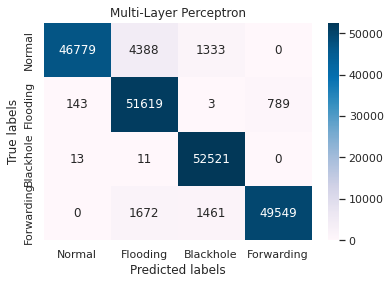

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
ax=sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

# set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Multi-Layer Perceptron')
#plt.figure(figsize=(6,5.5))
  #ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  #sns.set(font_scale=1)
  #ax.set_xlabel('\nPredicted Values')
  #ax.set_ylabel('Actual Values\n');
ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])

# display the plot
plt.show()

**Long Short-Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

**Convolutional Neural Network (CNN)**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_dim=X_train.shape[1], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: ignored

**Recurrent Neural Network (RNN)**

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

**Bidirectional LSTM (BiLSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Define the bidirectional LSTM model
model = Sequential()
##model.add(Reshape((120, 2048), input_dim=X_train.shape[1]))

model.add(Bidirectional(LSTM(32, activation='relu'), input_dim=X_train.shape[1]))
model.add(Dense(4, activation='softmax'))



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

ValueError: ignored

**Gated Recurrent Unit (GRU)**

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Define the GRU model
model = Sequential()
model.add(GRU(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

**Stacking Ensemble Machine Learning**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 1.00 (+/- 0.00)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


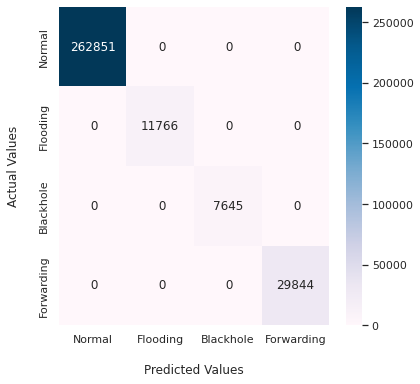

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import six
import sys
sys.modules['sklearn.externals.six'] = six
##import mlrose
from mlxtend.classifier import StackingClassifier

# Load the dataset
data = pd.read_csv('dataset.csv')

# Separate the features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the base models
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(random_state=42)
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the Stacking classifier
stacked_model = StackingClassifier(
    classifiers=models,
    meta_classifier=meta_model,
    use_probas=True,
    average_probas=False
)

# Evaluate the Stacking classifier using cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(
    stacked_model,
    X,
    y,
    cv=cv,
    scoring='accuracy'
)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Make predictions using the Stacking classifier
stacked_model.fit(X, y)
y_pred = stacked_model.predict(X)

# Plot the confusion matrix
conf_mat(y, y_pred)

## **Recurrent Neural Network (RNN)**

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
data = pd.read_csv('dataset.csv')

# Pre-process the data 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode categorical labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# One-hot encode the categorical labels
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y.reshape(-1,1))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape data for RNN input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model 
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Inverse transform categorical labels to original values
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test.argmax(axis=1), predicted_classes)
print("Classification Report:")
print(cr)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/5
3902/3902 [==============================] - 14s 3ms/step - loss: 0.5804 - accuracy: 0.9283
Epoch 2/5
3902/3902 [==============================] - 13s 3ms/step - loss: 0.2100 - accuracy: 0.9358
Epoch 3/5
3902/3902 [==============================] - 13s 3ms/step - loss: 0.1861 - accuracy: 0.9378
Epoch 4/5
3902/3902 [==============================] - 13s 3ms/step - loss: 0.1707 - accuracy: 0.9403
Epoch 5/5
976/976 [==============================] - 2s 2ms/step - loss: 0.1356 - accuracy: 0.9499
Test Loss: 0.13557219505310059
Test Accuracy: 0.9498894810676575
1951/1951 [==============================] - 3s 2ms/step
Confusion Matrix:
[[52260    16   336     0]
 [ 1856   207     0   245]
 [  571     0   864    98]
 [    0     0     6  5963]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     52612
           1       0.93      0.09      0.16      2308
           2       0.72      0.56      0.63      1533
    

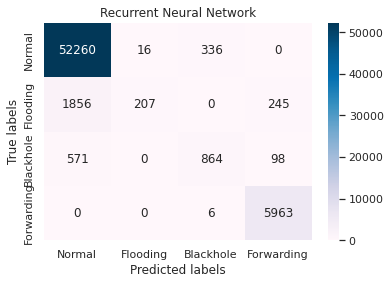

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
ax=sns.heatmap(cm, annot=True, cmap='PuBu', fmt='g')

# set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Recurrent Neural Network')
#plt.figure(figsize=(6,5.5))
  #ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='PuBu')
  #sns.set(font_scale=1)
  #ax.set_xlabel('\nPredicted Values')
  #ax.set_ylabel('Actual Values\n');
ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])

# display the plot
plt.show()

### **Convolutional Neural Networks (CNN)**

In [43]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, classification_report

# Load the data from the Excel file
data = pd.read_csv('dataset.csv')

# Pre-process the data
data_x = data.iloc[:, :-1].values
data_y = data.iloc[:, -1].values
data_x = data_x.reshape(data_x.shape[0], 28, 28, 1) 
# if input is images of 28x28 size, else adjust according to your input size

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Build the deep learning model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(x_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)


ValueError: ignored

In [44]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, classification_report

# Load the data from the Excel file
data = pd.read_csv('dataset.csv')

# Pre-process the data
data_x = data.iloc[:, :-1].values
data_y = data.iloc[:, -1].values
data_x = data_x.reshape(data_x.shape[0], 28, 28, 1)  # Fix here

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Build the deep learning model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(x_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)


ValueError: ignored

In [56]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, classification_report

# Load the data from the Excel file
data = pd.read_csv('dataset.csv')

# Pre-process the data
data_x = data.iloc[:, :-1].values
data_y = data.iloc[:, -1].values
data_x = data_x.reshape(data_x.shape[0], 28, 28, 1)  # Fix here

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Build the deep learning model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile and train the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model on the test set 
score = model.evaluate(x_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model 
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)


ValueError: ignored